In [2]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_circles, make_moons
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools

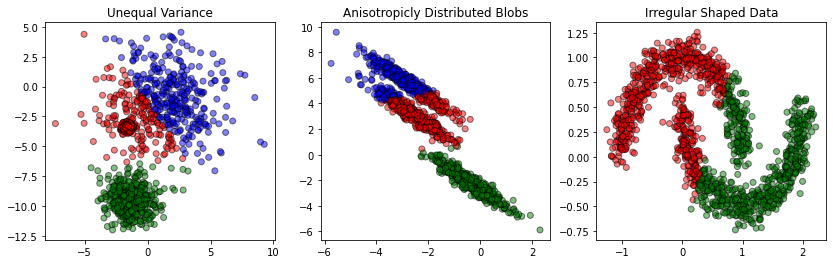

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))

# unequal variance
X, y = make_blobs(n_samples=1400,
    cluster_std=[1.0, 2.5, 0.2],
    random_state=2)
y_pred = KMeans(n_clusters=3, random_state=2).fit_predict(X)
colors = [['r', 'g', 'b'][c] for c in y_pred]

axs[0].scatter(X[:, 0], X[:, 1], 
	color=colors, edgecolor='k', alpha=0.5)
axs[0].set_title("Unequal Variance")

# anisotropically distributed data
X, y = make_blobs(n_samples=1400, random_state=156)
transformation = [
	[0.60834549, -0.63667341],
	[-0.40887718, 0.85253229]
]
X = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X)
colors = [['r', 'g', 'b'][c] for c in y_pred]

axs[1].scatter(X[:, 0], X[:, 1], 
	color=colors, edgecolor='k', alpha=0.5)
axs[1].set_title("Anisotropicly Distributed Blobs")

# irregular shaped data
X, y = make_moons(n_samples=1400, shuffle=True, 
	noise=0.1, random_state=120)
y_pred = KMeans(n_clusters=2, random_state=0).fit_predict(X)
colors = [['r', 'g', 'b'][c] for c in y_pred]

axs[2].scatter(X[:, 0], X[:, 1], 
	color=colors, edgecolor='k', alpha=0.5)
axs[2].set_title("Irregular Shaped Data")

plt.show()

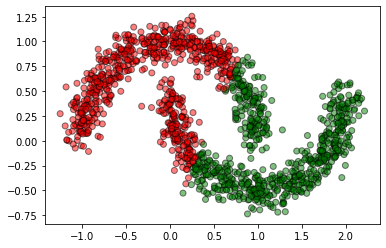

In [4]:
plt.scatter(X[:, 0], X[: ,1],
           color=colors, edgecolor='k', alpha=0.5)

In [5]:
oldData = np.array((X[: ,0] ,X[:,1]))
oldData

array([[ 1.78054584,  0.78714851,  0.65309044, ...,  1.04836945,
         0.03212259,  1.53086715],
       [-0.07960598, -0.59470091,  0.78998645, ..., -0.09381272,
         0.47593231, -0.19302242]])

In [6]:
def mapping(X ,Y):
    x = np.sqrt(2)*X[:]*Y[:]  
    y = X ** 2  
    z = Y ** 2 
    trans = np.array([x ,y ,z])
    return trans

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [8]:
newData = mapping(X_train[: ,0] ,X_train[: ,1])
newData

array([[ 0.6034434 ,  0.39824842,  0.10745159, ..., -0.7597507 ,
        -0.71086925, -1.2489481 ],
       [ 4.3341298 ,  3.80542801,  1.04770568, ...,  0.72944293,
         0.35767398,  1.50443129],
       [ 0.04200889,  0.02083889,  0.00551006, ...,  0.39565887,
         0.70641857,  0.51842559]])

In [9]:
newData = newData.T

In [10]:
newData.shape

(1050, 3)

In [11]:
from sklearn.cluster import KMeans
import seaborn as sns

In [12]:
kmeans1 = KMeans(n_clusters=2, random_state=42) 
kmeans1.fit(newData)
y_kmeans_p = kmeans1.predict(newData)
labels = kmeans1.labels_

In [13]:
len(y_kmeans_p)

1050

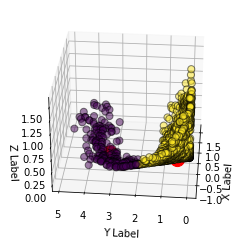

In [14]:
fig = plt.figure()
label_lin = np.array([0,0,0,0,0,1,1,1,1,1])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newData[:,0], newData[:,1], newData[:,2], c=y_kmeans_p, s=50, cmap='viridis', edgecolor='k', alpha=0.5)
ax.view_init(30, 185)
centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [15]:
from tslearn.clustering import KernelKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

seed = 0
gak_km = KernelKMeans(n_clusters=2,
                      kernel_params={"sigma": "auto"},
                      n_init=20,
                      verbose=True,
                      random_state=seed)
y_pred = gak_km.fit_predict(newData)

/Users/rezamosavi/opt/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1050 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 551775 out of 551775 | elapsed:   58.7s finished


Init 1
1399.462 --> 1204.205 --> 1167.905 --> 1161.978 --> 1158.151 --> 1157.801 --> 1157.801 --> 
Init 2
1398.521 --> 1249.182 --> 1238.389 --> 1224.935 --> 1213.769 --> 1198.736 --> 1179.799 --> 1176.694 --> 1174.344 --> 1163.379 --> 1158.551 --> 1157.801 --> 1157.801 --> 
Init 3
1392.360 --> 1177.653 --> 1164.247 --> 1158.979 --> 1157.801 --> 1157.801 --> 
Init 4
1404.808 --> 1235.821 --> 1160.925 --> 1158.151 --> 1157.801 --> 1157.801 --> 
Init 5
1385.594 --> 1231.935 --> 1200.728 --> 1157.165 --> 1156.418 --> 1157.226 --> 1157.801 --> 1157.801 --> 
Init 6
1393.920 --> 1162.554 --> 1154.796 --> 1156.418 --> 1157.226 --> 1157.801 --> 1157.801 --> 
Init 7
1401.424 --> 1294.629 --> 1265.967 --> 1254.149 --> 1236.990 --> 1222.521 --> 1201.337 --> 1175.552 --> 1165.770 --> 1160.663 --> 1158.151 --> 1157.801 --> 1157.801 --> 
Init 8
1397.321 --> 1234.252 --> 1231.875 --> 1230.962 --> 1228.635 --> 1228.334 --> 1233.336 --> 1236.534 --> 1239.656 --> 1243.843 --> 1249.762 --> 1251.333 --> 1

In [16]:
y_pred

array([1, 1, 0, ..., 0, 0, 1])

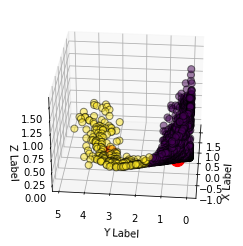

In [17]:
fig = plt.figure()
label_lin = np.array([0,0,0,0,0,1,1,1,1,1])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newData[:,0], newData[:,1], newData[:,2], c=y_pred, s=50, cmap='viridis', edgecolor='k', alpha=0.5)
ax.view_init(30, 185)
centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [285]:
oldData = oldData.T

In [238]:
kmeans = KMeans(n_clusters=2, random_state=42) 
kmeans.fit(oldData)
y_kmeans = kmeans.predict(oldData)
labels = kmeans.labels_
y_kmeans

array([0, 0, 1, ..., 0, 1, 0], dtype=int32)

In [234]:
y_kmeans

array([0, 1], dtype=int32)

In [232]:
oldData = oldData.T
oldData

array([[ 1.78054584, -0.07960598],
       [ 0.78714851, -0.59470091],
       [ 0.65309044,  0.78998645],
       ...,
       [ 1.04836945, -0.09381272],
       [ 0.03212259,  0.47593231],
       [ 1.53086715, -0.19302242]])

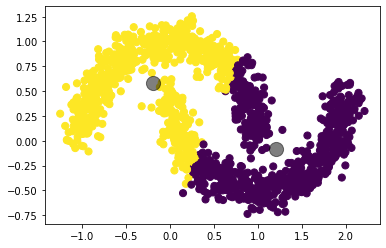

In [240]:
plt.scatter(oldData[:, 0], oldData[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [302]:
def getAccuracy(x,y):
    Y = kmeans1.predict(x)
    counter = 0
    c = 0
    for i in Y:
        if i == y[c]:
            counter +=1
        c+=1
    
    return (100 * counter) /len(Y) ,counter

In [309]:
data = mapping(X_test[:,0] ,X_test[:,1])
data.shape

(3, 350)

In [310]:
data = data.T

In [311]:
data.shape

(350, 3)

In [314]:
getAccuracy(data ,y_test)

(26.571428571428573, 93)

In [301]:
len(y_test)

350